Test juste camera

In [9]:
import cv2
import numpy as np

VideoCap=cv2.VideoCapture(1)
VideoCap.isOpened()
#i = 0
#print(return_camera_indices())
while True:
    #i = i+1
    check, frame= VideoCap.read()
    

    cv2.imshow('image', frame)
    

    if cv2.waitKey(1)&0xFF==ord('q'):
        VideoCap.release()
        cv2.destroyAllWindows()
        break
    
print(frame)
VideoCap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

Test basique :

In [19]:
import math 
#print(round(2.1))

print(math.ceil(4.2)) 
print(math.floor(4.2)) 

a = np.zeros((2,2))
print(a)

a = np.empty()


5
4
[[0. 0.]
 [0. 0.]]


TypeError: empty() missing required argument 'shape' (pos 1)

Test élargir les obstacles

631
[[47 46 45 ... 22 23 24]
 [47 46 45 ... 18 17 16]]


<Figure size 432x288 with 0 Axes>

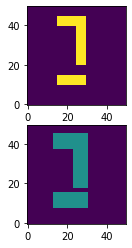

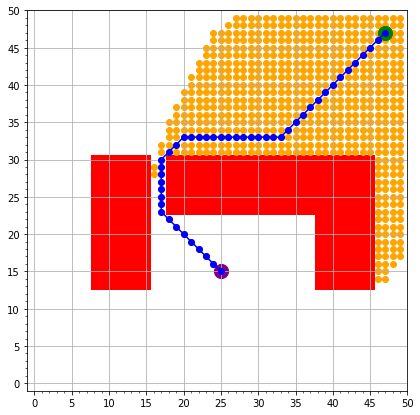

In [1]:
from Map import Map
from robot import Robot
import optimal_path as op
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
import video_frame as vf

George = Robot((47,47),(25,15))
lausanne = Map(5,50)

# Grid test initialisation
frame = np.zeros((50,50))
frame[10:15,15:30] = 1
frame[20:40,25:30] = 1
frame[40:45,15:30] = 1



# Expand the grid 
new_frame = lausanne.security_grid_expand(frame)


########################
## PLOT AND PATH CALCULATION TEST
#########################
len_i = len(frame)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(2,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
ax[0].imshow(frame, vmin=0, vmax=1, origin='lower', interpolation='none', alpha=1)
ax[1].imshow(new_frame, vmin=0, vmax=1, origin='lower', interpolation='none', alpha=1)
plt.draw()

path, visitedNodes = op.path_computation(George.get_start() , George.get_goal() , len_i, new_frame)

George.set_path(path) 
George.set_visit_nodes(visitedNodes) 

# Display the optimal path
op.display_map(len_i,  new_frame,  George.get_visit_nodes(), George.get_path(), George.get_start(), George.get_goal())


plt.show()




AFFICHE LA FRAME

In [13]:
from Map import Map
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
import video_frame as vf


frame = vf.frame_capture(10,1) 


print(frame[350,600])

TypeError: load() takes 1 positional argument but 2 were given

PREND UNE PHOTO ET ENREGISTRE

In [12]:
import cv2
VideoCap=cv2.VideoCapture(0)
success,image = VideoCap.read()
while success:  
  success,image = VideoCap.read()
  cv2.imshow('image',image)
  keyVal = cv2.waitKey(1) & 0xFF
  if keyVal == ord('q'):
      cv2.imwrite("frame.jpg", image)  # save frame as JPEG file  
      break

TEST RESIZING 

In [1]:
from Map import Map
from robot import Robot
import optimal_path as op
#import matplotlib.pyplot as plt
#import math
import cv2
import numpy as np
import video_frame as vf

George = Robot((47,47),(25,15))
lausanne = Map(5,50)

print('start')
frame = cv2.imread('frame.jpg')

######################################################
# récupération du mask ---> Fonction Xav 

blue = 120

color = blue
sensitivity = 20

lo=np.array([color - sensitivity, 50, 50])
hi=np.array([color + sensitivity, 255, 255])

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
frame=cv2.blur(frame, (5, 5))
mask=cv2.inRange(frame, lo, hi)
mask=cv2.erode(mask, None, iterations=2)
mask=cv2.dilate(mask, None, iterations=2) 
    
cv2.imshow(" image", frame)
cv2.imshow(" image", mask)

print("frame dimensions", frame.shape)

# ---------------
######################################################
print('Mask op')
# OP sur le mask

lausanne.init_grid(mask)

#lausanne.grid_show()
cv2.imshow(" image", lausanne.get_map())

print('wait end')
cv2.waitKey(0)
cv2.destroyAllWindows()

start
frame dimensions (720, 1280, 3)
Mask op
Resized Dimensions :  (103, 184)
wait end
